In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from sklearn.metrics.pairwise import cosine_similarity 
from lib.extractor import ImgExtractor
from lib.compare import compare_similarity
from tensorflow.keras.preprocessing import image_dataset_from_directory

# 1: Build dataset for train data & val data

In [6]:
PATH = "hymenoptera_data"
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'val')
print(f"Train folder: {train_dir}, val folder: {validation_dir}")
BATCH_SIZE = 32
IMG_SIZE = (160, 160)

train_dataset = image_dataset_from_directory(train_dir, shuffle=True, batch_size=BATCH_SIZE, image_size=IMG_SIZE)
validation_dataset = image_dataset_from_directory(validation_dir, shuffle=True, batch_size=BATCH_SIZE, image_size=IMG_SIZE)

Train folder: hymenoptera_data/train, val folder: hymenoptera_data/val
Found 245 files belonging to 2 classes.


In [7]:
train_dataset

<BatchDataset shapes: ((None, 160, 160, 3), (None,)), types: (tf.float32, tf.int32)>

In [10]:
images

<tf.Tensor: shape=(32, 160, 160, 3), dtype=float32, numpy=
array([[[[1.52705078e+02, 1.24298828e+02, 9.83828125e+01],
         [1.48069336e+02, 1.31220703e+02, 1.11985352e+02],
         [1.65843750e+02, 1.39818359e+02, 1.10679688e+02],
         ...,
         [1.74008789e+02, 1.42885742e+02, 1.20835938e+02],
         [1.25268555e+02, 9.48486328e+01, 6.22050781e+01],
         [1.00886719e+02, 8.11406250e+01, 7.00361328e+01]],

        [[1.30897461e+02, 9.93095703e+01, 7.42119141e+01],
         [1.37250000e+02, 1.14151367e+02, 9.39628906e+01],
         [1.61837891e+02, 1.35591797e+02, 1.10113281e+02],
         ...,
         [1.47926758e+02, 1.21239258e+02, 9.21484375e+01],
         [1.55055664e+02, 1.25230469e+02, 9.77109375e+01],
         [9.74941406e+01, 8.02294922e+01, 5.98720703e+01]],

        [[1.29232422e+02, 1.05967773e+02, 8.62226562e+01],
         [1.31761719e+02, 1.11705078e+02, 8.98671875e+01],
         [1.51211914e+02, 1.20177734e+02, 1.01824219e+02],
         ...,
         [

In [11]:
images.shape

TensorShape([32, 160, 160, 3])

# 2: EDA on some image (visualization)

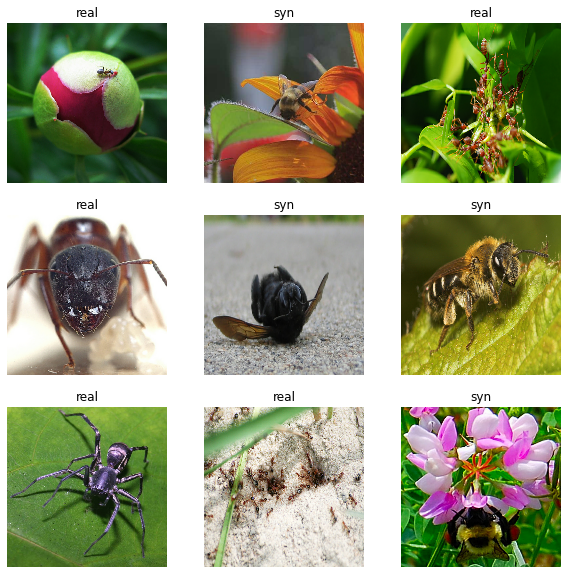

In [18]:
class_names = train_dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1): # takes; 加载一个文件
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

# 3: Load pretrained model (google/microsoft trained model)

In [28]:
IMG_SIZE

(160, 160)

In [39]:
IMG_SHAPE = IMG_SIZE + (3,)
# base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE, include_top=False, weights='imagenet')
base_model = tf.keras.applications.VGG19(input_shape=IMG_SHAPE, include_top=False, weights='imagenet')

80142336/80134624 [==============================] - 9s 0us/step


In [40]:
base_model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 160, 160, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 160, 160, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 160, 160, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 80, 80, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 80, 80, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 80, 80, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 40, 40, 128)       0     

In [41]:
IMG_SHAPE

(160, 160, 3)

In [42]:
train_dataset

<BatchDataset shapes: ((None, 160, 160, 3), (None,)), types: (tf.float32, tf.int32)>

# 4: 加载32(one batch)图 并用model 抽features

In [43]:
image_batch, label_batch = next(iter(train_dataset)) 

In [44]:
image_batch.shape

TensorShape([32, 160, 160, 3])

In [45]:
label_batch.shape

TensorShape([32])

In [46]:
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 5, 5, 512)


# 5: Compare similarity 

In [48]:
fea_arr = feature_batch.numpy()

In [49]:
fea_arr.shape

(32, 5, 5, 512)

In [51]:
def compare_simi(arr1, arr2):
    simiScore = cosine_similarity(arr1, arr2)
    return simiScore

In [55]:
fea_arr[0].shape

(5, 5, 512)

In [57]:
fea_arr[0].reshape(1, -1)

array([[0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [56]:
compare_simi(fea_arr[0].reshape(1, -1), fea_arr[1].reshape(1, -1))

array([[0.08878944]], dtype=float32)